In [1]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
from matplotlib import style
import pickle

In [2]:
style.use('ggplot')

quandl.ApiConfig.api_key = "EtXsJzsv4BzFJCHfGqoj"
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [3]:
df = df[['Adj. Open', 'Adj. High' , 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100
df['PCT_CHANGE'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

df = df[['Adj. Close', 'HL_PCT', 'PCT_CHANGE', 'Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [4]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

# predicting last 10% of the dataset
forecast_out = int(math.ceil(0.1*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,214.005615
2004-08-20,54.322689,0.710922,7.227007,22834300.0,210.725489
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,1.886792,1.183658,9188600.0,223.309335


In [5]:
X = np.array(df.drop(['label'], 1))

# gotta include your new data to the training data
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

print(X[:5])
print(y[:5])

[[-1.39187095  2.33516806  0.23254018  4.46712802]
 [-1.37635178 -0.31135438  4.81828847  1.8207495 ]
 [-1.37423066  2.35004252 -0.79917922  1.26561472]
 [-1.38304594  4.72006231 -3.78798912  0.90077929]
 [-1.38084699  0.72540087  0.80305818  0.16612482]]
[ 214.00561483  210.7254894   208.07229925  218.28883673  223.30933452]


In [6]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(train_x, train_y)

with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)
    
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(test_x, test_y)

print(accuracy)

0.88148487137


In [7]:
forecast_set = clf.predict(X_lately)
print(forecast_set)

[  961.8460381    949.26390821   976.30339982   972.76775076   983.29382247
   978.74364177   982.23009428   985.4652282    976.28987057   972.49060082
  1000.86137364   991.65625023   977.31522148   960.0234227    960.61745335
   975.22769982   974.84959421   991.69910388   994.86968981  1012.86142299
  1010.53477232  1026.8644565   1025.98975848  1022.19526515  1012.72263253
  1016.97120677  1015.94883854  1011.65427334  1008.5631949   1008.53983088
  1016.04531226  1006.40060881  1002.31885516   992.71512562  1013.28210735
  1010.09663277  1014.88640625  1036.64907903  1032.63575683  1030.35681632
  1033.19052793  1032.50162954  1037.42834279  1030.03107246  1030.80306795
  1033.34780525  1029.80743743  1057.92298165  1059.33070161  1069.65135983
  1066.73420631  1068.51877439  1031.64798194  1022.91454751  1018.62115718
  1027.30062301  1025.16804577  1022.32765599  1036.08799092  1036.63515095
  1032.91840465  1041.48346336  1046.87816719  1046.39789399  1045.30990951
  1049.58787

<IPython.core.display.Javascript object>


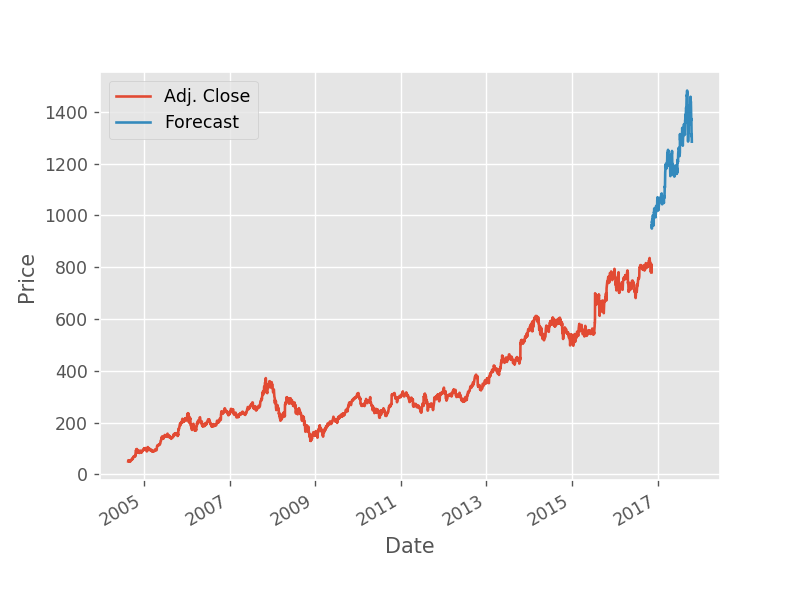

In [8]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

%matplotlib notebook
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()